In [ ]:
#imported libraries for preprocessing
import pandas as pd
import numpy as np

In [ ]:
# read data from csv file
df= pd.read_csv("car_prices.csv")

In [ ]:
#display data
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [155]:
## PREPROCESSING
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
#display null values
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [ ]:
# fill null numeric values to mean values 
df['year'] = df['year'].fillna(df['year'].mean())
df['condition'] = df['condition'].fillna(df['condition'].mean())
df['odometer'] = df['odometer'].fillna(df['odometer'].mean())
df['mmr'] = df['mmr'].fillna(df['mmr'].mean())
df['sellingprice'] = df['sellingprice'].fillna(df['sellingprice'].mean())

In [158]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition           0
odometer            0
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate           12
dtype: int64

In [ ]:
# fill categoric null values to 'unknown'
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].fillna('Unknown')

In [160]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [ ]:
# drop not necessary valeus
df.drop(columns=['vin','saledate'], inplace=True)
df.nunique()

year                34
make                97
model              974
trim              1964
body                88
transmission         5
state               64
condition           42
odometer        172279
color               47
interior            18
seller           14263
mmr               1102
sellingprice      1888
dtype: int64

In [ ]:
# find most used 10 values for columns and replace other values with 'other' keyword
columns_to_transform = ["make", "model", "trim", "body", "state", "color", "interior", "seller"]

for col in columns_to_transform:
    top_10_values = df[col].value_counts().nlargest(10).index
    df[col] = df[col].apply(lambda x: x if x in top_10_values else "Other")

print(df)

        year    make     model   trim      body transmission  state  \
0       2015     Kia     Other     LX       SUV    automatic     ca   
1       2015     Kia     Other     LX       SUV    automatic     ca   
2       2014     BMW  3 Series  Other     Sedan    automatic     ca   
3       2015   Other     Other  Other     Sedan    automatic     ca   
4       2014     BMW     Other  Other     Sedan    automatic     ca   
...      ...     ...       ...    ...       ...          ...    ...   
558832  2015     Kia     Other  Other     Sedan      Unknown  Other   
558833  2012   Other     Other  Other  Crew Cab    automatic  Other   
558834  2012     BMW     Other  Other       SUV    automatic     ca   
558835  2015  Nissan    Altima  Other     sedan    automatic     ga   
558836  2014    Ford     F-150    XLT     Other    automatic     ca   

        condition  odometer   color interior            seller      mmr  \
0             5.0   16639.0   white    black             Other  20500.0 

In [163]:

df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Other,LX,SUV,automatic,ca,5.0,16639.0,white,black,Other,20500.0,21500.0
1,2015,Kia,Other,LX,SUV,automatic,ca,5.0,9393.0,white,beige,Other,20800.0,21500.0
2,2014,BMW,3 Series,Other,Sedan,automatic,ca,45.0,1331.0,gray,black,Other,31900.0,30000.0
3,2015,Other,Other,Other,Sedan,automatic,ca,41.0,14282.0,white,black,Other,27500.0,27750.0
4,2014,BMW,Other,Other,Sedan,automatic,ca,43.0,2641.0,gray,black,Other,66000.0,67000.0


In [ ]:
# display mid max values for numeric columns
numeric_columns = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
min_max_values = df[numeric_columns].agg(['min', 'max'])
print(min_max_values)

     year  condition  odometer       mmr  sellingprice
min  1982        1.0       1.0      25.0           1.0
max  2015       49.0  999999.0  182000.0      230000.0


In [165]:
# Year categories
df['year_category'] = pd.cut(df['year'], 
                                     bins=[1980, 2000, 2010, 2016], 
                                     labels=['Old', 'Medium', 'New'])

# Condition categories
df['condition_category'] = pd.cut(df['condition'], 
                                           bins=[0, 20, 40, 50], 
                                           labels=['Good', 'Average', 'Poor'])

# Odometer categories
df['odometer_category'] = pd.cut(df['odometer'], 
                                         bins=[0, 50000, 200000, 1000000], 
                                         labels=['Low Usage', 'Moderate Usage', 'High Usage'])

# MMR categories
df['mmr_category'] = pd.cut(df['mmr'], 
                                     bins=[0, 50000, 100000, 200000], 
                                     labels=['Low Price', 'Medium Price', 'High Price'])

# Selling price categories
df['sellingprice_category'] = pd.cut(df['sellingprice'], 
                                             bins=[0, 50000, 150000, 250000], 
                                             labels=['Low Price', 'Medium Price', 'High Price'])
df = df.drop(columns=['year','condition','odometer', 'mmr','sellingprice'])

print(df.head())


    make     model   trim   body transmission state  color interior seller  \
0    Kia     Other     LX    SUV    automatic    ca  white    black  Other   
1    Kia     Other     LX    SUV    automatic    ca  white    beige  Other   
2    BMW  3 Series  Other  Sedan    automatic    ca   gray    black  Other   
3  Other     Other  Other  Sedan    automatic    ca  white    black  Other   
4    BMW     Other  Other  Sedan    automatic    ca   gray    black  Other   

  year_category condition_category odometer_category  mmr_category  \
0           New               Good         Low Usage     Low Price   
1           New               Good         Low Usage     Low Price   
2           New               Poor         Low Usage     Low Price   
3           New               Poor         Low Usage     Low Price   
4           New               Poor         Low Usage  Medium Price   

  sellingprice_category  
0             Low Price  
1             Low Price  
2             Low Price  
3     

In [ ]:
# encoded datas
columns_to_encode = ['make', 'model', 'trim', 'body', 'transmission', 'state', 
                     'color', 'interior', 'seller', 'year_category', 
                     'condition_category', 'odometer_category', 'mmr_category', 
                     'sellingprice_category']

# One-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode)

In [167]:
df.head()

,make_BMW,make_Chevrolet,make_Chrysler,make_Dodge,make_Ford,make_Honda,make_Hyundai,make_Kia,make_Nissan,make_Other,...,condition_category_Poor,odometer_category_Low Usage,odometer_category_Moderate Usage,odometer_category_High Usage,mmr_category_Low Price,mmr_category_Medium Price,mmr_category_High Price,sellingprice_category_Low Price,sellingprice_category_Medium Price,sellingprice_category_High Price
0,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,True,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False


In [ ]:
# random 100000 values select for fast process
df = df.sample(n=100000, random_state=20) 
df_apriori= df.copy()
df_fpgrowth=df.copy()
df_eclat=df.copy()
df_agnes= df.copy()
df_kmeans= df.copy()
df_DBSCAN= df.copy()

In [ ]:
# import necessary libraries
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# 1. apply Apriori algorithm

min_support = 0.05  # Minimum support value
frequent_itemsets = apriori(df_apriori, min_support=min_support, use_colnames=True)
##  END OF APRIORI ALGORITHM

In [ ]:
# 2. Calculate Support,Confidence and Lift
rules = association_rules(frequent_itemsets,num_itemsets=int, metric="confidence", min_threshold=0.1)

summary = {
    "Support": {
        "Mean": rules["support"].mean(),
        "Min": rules["support"].min(),
        "Max": rules["support"].max()
    },
    "Confidence": {
        "Mean": rules["confidence"].mean(),
        "Min": rules["confidence"].min(),
        "Max": rules["confidence"].max()
    },
    "Lift": {
        "Mean": rules["lift"].mean(),
        "Min": rules["lift"].min(),
        "Max": rules["lift"].max()
    }
}

# print summary
for metric, stats in summary.items():
    print(f"{metric}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value:.4f}")

Support:
  Mean: 0.0840
  Min: 0.0500
  Max: 0.9910
Confidence:
  Mean: 0.4140
  Min: 0.1000
  Max: 1.0000
Lift:
  Mean: 1.2329
  Min: 0.3595
  Max: 4.7593


In [ ]:
## BEGIN OF FP-Growth Algorıthm
import pyfpgrowth
df_fpgrowth.head()

,make_BMW,make_Chevrolet,make_Chrysler,make_Dodge,make_Ford,make_Honda,make_Hyundai,make_Kia,make_Nissan,make_Other,...,condition_category_Poor,odometer_category_Low Usage,odometer_category_Moderate Usage,odometer_category_High Usage,mmr_category_Low Price,mmr_category_Medium Price,mmr_category_High Price,sellingprice_category_Low Price,sellingprice_category_Medium Price,sellingprice_category_High Price
287096,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
368493,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
89925,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,False,False,True,False,False
232964,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
263701,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False


In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

min_support = 0.05  # Minimum support value
frequent_itemsets = fpgrowth(df_fpgrowth, min_support=min_support, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets,num_itemsets=int, metric="confidence", min_threshold=0.1)

summary = {
    "Support": {
        "Mean": rules["support"].mean(),
        "Min": rules["support"].min(),
        "Max": rules["support"].max()
    },
    "Confidence": {
        "Mean": rules["confidence"].mean(),
        "Min": rules["confidence"].min(),
        "Max": rules["confidence"].max()
    },
    "Lift": {
        "Mean": rules["lift"].mean(),
        "Min": rules["lift"].min(),
        "Max": rules["lift"].max()
    }
}

for metric, stats in summary.items():
    print(f"{metric}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value:.4f}")

Support:
  Mean: 0.0840
  Min: 0.0500
  Max: 0.9910
Confidence:
  Mean: 0.4140
  Min: 0.1000
  Max: 1.0000
Lift:
  Mean: 1.2329
  Min: 0.3595
  Max: 4.7593


In [135]:
# End of fpgrowth algorithm
df.head()

,make_BMW,make_Chevrolet,make_Chrysler,make_Dodge,make_Ford,make_Honda,make_Hyundai,make_Kia,make_Nissan,make_Other,...,condition_category_Poor,odometer_category_Low Usage,odometer_category_Moderate Usage,odometer_category_High Usage,mmr_category_Low Price,mmr_category_Medium Price,mmr_category_High Price,sellingprice_category_Low Price,sellingprice_category_Medium Price,sellingprice_category_High Price
287096,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
368493,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
89925,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,False,False,True,False,False
232964,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
263701,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False


In [136]:
## ECLAT Algorithm Begin

df_eclat.head()

,make_BMW,make_Chevrolet,make_Chrysler,make_Dodge,make_Ford,make_Honda,make_Hyundai,make_Kia,make_Nissan,make_Other,...,condition_category_Poor,odometer_category_Low Usage,odometer_category_Moderate Usage,odometer_category_High Usage,mmr_category_Low Price,mmr_category_Medium Price,mmr_category_High Price,sellingprice_category_Low Price,sellingprice_category_Medium Price,sellingprice_category_High Price
287096,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
368493,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
89925,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,False,False,True,False,False
232964,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
263701,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False


In [137]:
from itertools import combinations
from collections import defaultdict

In [ ]:
min_support = 0.2

# 1. Transaction list 
def create_transaction_list(df):
    transaction_list = {col: set(df.index[df[col]]) for col in df.columns}
    return transaction_list

# 2. Eclat algorithm
def eclat(transaction_list, min_support, df_size):
    frequent_itemsets = []

    def recursive_eclat(prefix, itemsets):
        while itemsets:
            item, transactions = itemsets.pop()
            support = len(transactions) / df_size
            if support >= min_support:
                frequent_itemsets.append((prefix | {item}, support))
                new_itemsets = [
                    (other_item, transactions & other_transactions)
                    for other_item, other_transactions in itemsets
                ]
                recursive_eclat(prefix | {item}, new_itemsets)

    items = list(transaction_list.items())
    recursive_eclat(set(), items)
    return frequent_itemsets

transaction_list = create_transaction_list(df_eclat)

df_size = len(df_eclat)

frequent_itemsets = eclat(transaction_list, min_support, df_size)

frequent_itemsets_df = pd.DataFrame(frequent_itemsets, columns=["itemsets", "support"])
#end of eclat algorithm

In [ ]:
def generate_rules(frequent_itemsets_df, min_confidence=0.1):
    rules = []
    for _, row in frequent_itemsets_df.iterrows():
        itemset = row["itemsets"]
        support = row["support"]
        for i in range(1, len(itemset)):
            for antecedent in combinations(itemset, i):
                antecedent = set(antecedent)
                consequent = itemset - antecedent
                if consequent:
                    antecedent_support = frequent_itemsets_df[
                        frequent_itemsets_df["itemsets"] == antecedent
                    ]["support"].values[0]
                    confidence = support / antecedent_support
                    if confidence >= min_confidence:
                        lift = confidence / frequent_itemsets_df[
                            frequent_itemsets_df["itemsets"] == consequent
                        ]["support"].values[0]
                        rules.append(
                            {
                                "antecedent": antecedent,
                                "consequent": consequent,
                                "support": support,
                                "confidence": confidence,
                                "lift": lift,
                            }
                        )
    return pd.DataFrame(rules)

rules_df = generate_rules(frequent_itemsets_df, min_confidence=0.1)

summary = {
    "Support": {
        "Mean": rules_df["support"].mean(),
        "Min": rules_df["support"].min(),
        "Max": rules_df["support"].max()
    },
    "Confidence": {
        "Mean": rules_df["confidence"].mean(),
        "Min": rules_df["confidence"].min(),
        "Max": rules_df["confidence"].max()
    },
    "Lift": {
        "Mean": rules_df["lift"].mean(),
        "Min": rules_df["lift"].min(),
        "Max": rules_df["lift"].max()
    }
}

for metric, stats in summary.items():
    print(f"{metric}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value:.4f}")

Support:
  Mean: 0.2724
  Min: 0.2000
  Max: 0.9910
Confidence:
  Mean: 0.5881
  Min: 0.2014
  Max: 1.0000
Lift:
  Mean: 1.1245
  Min: 0.8116
  Max: 2.0256


In [42]:
#begin of k-means algorithm
df_kmeans.head()

,make_BMW,make_Chevrolet,make_Chrysler,make_Dodge,make_Ford,make_Honda,make_Hyundai,make_Kia,make_Nissan,make_Other,...,condition_category_Poor,odometer_category_Low Usage,odometer_category_Moderate Usage,odometer_category_High Usage,mmr_category_Low Price,mmr_category_Medium Price,mmr_category_High Price,sellingprice_category_Low Price,sellingprice_category_Medium Price,sellingprice_category_High Price
287096,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
368493,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
89925,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,False,False,True,False,False
232964,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
263701,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False


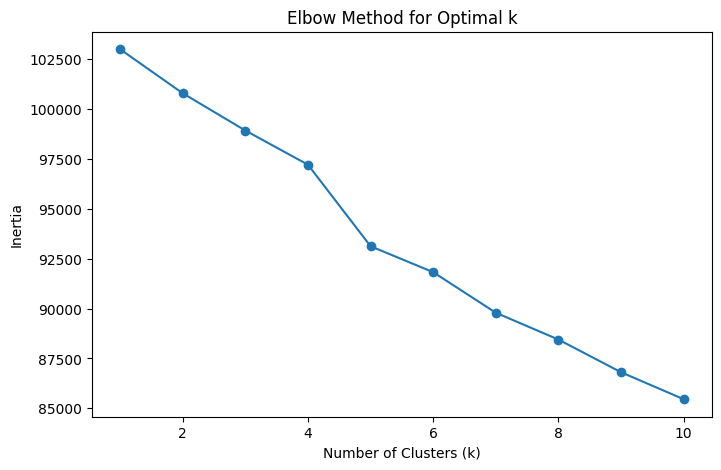

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_kmeans)

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


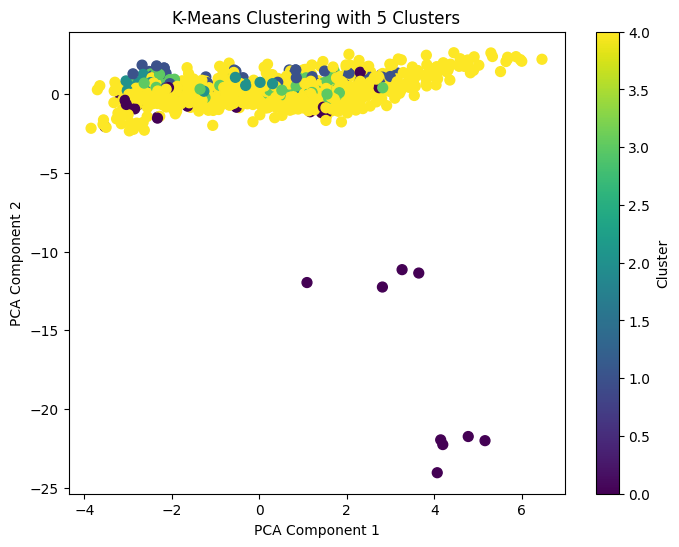

In [ ]:
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, random_state=20, n_init='auto')
clusters = kmeans.fit_predict(df_normalized)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, random_state=20, n_init='auto')
clusters = kmeans.fit_predict(df_normalized)

silhouette_avg = silhouette_score(df_normalized, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")

davies_bouldin_avg = davies_bouldin_score(df_normalized, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.4f}")

Silhouette Score: 0.0512
Davies-Bouldin Index: 3.0985


In [142]:
# end of k-means algorithm
# begin of AGNES algorithm
df_agnes.head()

,make_BMW,make_Chevrolet,make_Chrysler,make_Dodge,make_Ford,make_Honda,make_Hyundai,make_Kia,make_Nissan,make_Other,...,condition_category_Poor,odometer_category_Low Usage,odometer_category_Moderate Usage,odometer_category_High Usage,mmr_category_Low Price,mmr_category_Medium Price,mmr_category_High Price,sellingprice_category_Low Price,sellingprice_category_Medium Price,sellingprice_category_High Price
287096,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
368493,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
89925,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,False,False,True,False,False
232964,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
263701,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False


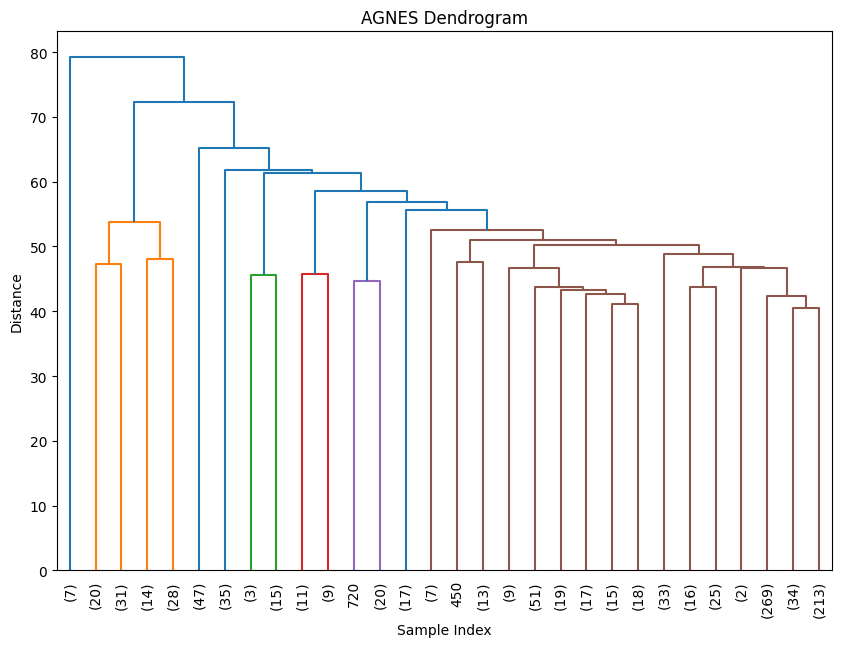

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_agnes)

linkage_matrix = linkage(df_normalized, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=30, leaf_rotation=90, leaf_font_size=10)
plt.title("AGNES Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

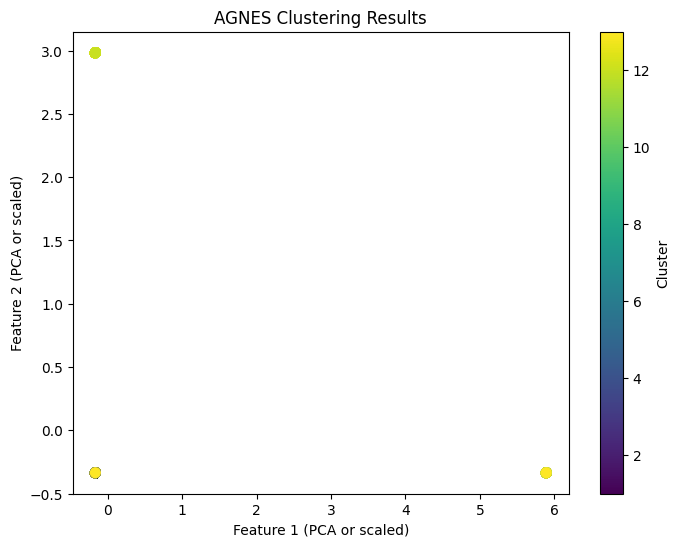

In [ ]:
max_distance = 50  
clusters = fcluster(linkage_matrix, max_distance, criterion='distance')

plt.figure(figsize=(8, 6))
plt.scatter(df_normalized[:, 0], df_normalized[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("AGNES Clustering Results")
plt.xlabel("Feature 1 (PCA or scaled)")
plt.ylabel("Feature 2 (PCA or scaled)")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_avg = silhouette_score(df_normalized, clusters)
db_index = davies_bouldin_score(df_normalized, clusters)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")

Silhouette Score: 0.098
Davies-Bouldin Index: 2.457


In [171]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_DBSCAN)

dbscan = DBSCAN(eps=0.5, min_samples=5) 
clusters = dbscan.fit_predict(df_normalized)


if len(set(clusters)) > 1:  
    silhouette_avg = silhouette_score(df_normalized, clusters)
    db_index = davies_bouldin_score(df_normalized, clusters)

    print(f"Silhouette Score: {silhouette_avg:.3f}")
    print(f"Davies-Bouldin Index: {db_index:.3f}")
else:
    print("There is no Silhouette Score and Davies-Bouldin Index.")



There is no Silhouette Score and Davies-Bouldin Index.
